In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [143]:
from sklearn.linear_model import LogisticRegression,LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.neighbors import KNeighborsRegressor,KNeighborsClassifier

from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
import sklearn.tree as tree
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier

from sklearn.metrics import accuracy_score


from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

import joblib

In [4]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
submission = pd.read_csv("submission.csv")

In [5]:
train.columns

Index(['Item_ID', 'Item_W', 'Item_Type', 'Item_MRP', 'Outlet_ID',
       'Outlet_Year', 'Outlet_Size', 'Outlet_Location_Type', 'Sales'],
      dtype='object')

In [6]:
test.columns

Index(['Item_ID', 'Item_W', 'Item_Type', 'Item_MRP', 'Outlet_ID',
       'Outlet_Year', 'Outlet_Size', 'Outlet_Location_Type'],
      dtype='object')

In [8]:
len(train.columns)

9

In [9]:
len(test.columns)

8

In [11]:
train.head()

,Item_ID,Item_W,Item_Type,Item_MRP,Outlet_ID,Outlet_Year,Outlet_Size,Outlet_Location_Type,Sales
0,FDU32,21.027499,Baking Goods,197.352319,OUT046,2004,Small,Tier 2,2689.457781
1,NCT54,21.102371,Meat,148.250214,OUT035,1987,Small,Tier 1,3437.350375
2,FDW08,20.882263,Hard Drinks,205.465010,OUT035,1999,Small,Tier 3,3129.967268
3,FDJ22,21.050435,Starchy Foods,253.417583,OUT046,1996,Small,Tier 1,1306.514376
4,FDF47,21.247876,Baking Goods,240.871039,OUT035,1988,Small,Tier 3,1739.769829


In [12]:
train.shape

(87864, 9)

In [14]:
test.shape

(37656, 8)

In [15]:
submission

,Sales
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
37651,0.0
37652,0.0
37653,0.0
37654,0.0


In [16]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87864 entries, 0 to 87863
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Item_ID               87864 non-null  object 
 1   Item_W                87864 non-null  float64
 2   Item_Type             87864 non-null  object 
 3   Item_MRP              87864 non-null  float64
 4   Outlet_ID             87864 non-null  object 
 5   Outlet_Year           87864 non-null  int64  
 6   Outlet_Size           87864 non-null  object 
 7   Outlet_Location_Type  87864 non-null  object 
 8   Sales                 87864 non-null  float64
dtypes: float64(3), int64(1), object(5)
memory usage: 6.0+ MB


In [17]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37656 entries, 0 to 37655
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Item_ID               37656 non-null  object 
 1   Item_W                37656 non-null  float64
 2   Item_Type             37656 non-null  object 
 3   Item_MRP              37656 non-null  float64
 4   Outlet_ID             37656 non-null  object 
 5   Outlet_Year           37656 non-null  int64  
 6   Outlet_Size           37656 non-null  object 
 7   Outlet_Location_Type  37656 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 2.3+ MB


In [19]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
Item_W,87864.0,15.591469,4.364429,7.992700,10.968658,15.831170,19.969936,21.250000
Item_MRP,87864.0,151.242943,59.536366,32.910015,112.423337,145.581473,197.110367,265.214271
Outlet_Year,87864.0,1999.870630,6.634290,1987.000000,1997.000000,1999.000000,2004.000000,2009.000000
Sales,87864.0,1911.842120,1291.386004,-1229.360345,959.249675,1606.307877,2608.057736,10309.283310


In [20]:
test.describe().T

,count,mean,std,min,25%,50%,75%,max
Item_W,37656.0,12.894124,3.976554,4.598804,9.586234,12.164591,16.178979,21.250000
Item_MRP,37656.0,145.880456,61.512420,32.986813,102.632085,140.457198,195.207653,265.210739
Outlet_Year,37656.0,2000.032956,6.882847,1987.000000,1997.000000,1999.000000,2004.000000,2009.000000


In [21]:
train.isna().sum()

Item_ID                 0
Item_W                  0
Item_Type               0
Item_MRP                0
Outlet_ID               0
Outlet_Year             0
Outlet_Size             0
Outlet_Location_Type    0
Sales                   0
dtype: int64

In [22]:
test.isna().sum()

Item_ID                 0
Item_W                  0
Item_Type               0
Item_MRP                0
Outlet_ID               0
Outlet_Year             0
Outlet_Size             0
Outlet_Location_Type    0
dtype: int64

### exploratory data analysis

1. Understand the data 
2 .Clean the Data 
3 . Analyse the relationship between data

In [26]:
train

,Item_ID,Item_W,Item_Type,Item_MRP,Outlet_ID,Outlet_Year,Outlet_Size,Outlet_Location_Type,Sales
0,FDU32,21.027499,Baking Goods,197.352319,OUT046,2004,Small,Tier 2,2689.457781
1,NCT54,21.102371,Meat,148.250214,OUT035,1987,Small,Tier 1,3437.350375
2,FDW08,20.882263,Hard Drinks,205.465010,OUT035,1999,Small,Tier 3,3129.967268
3,FDJ22,21.050435,Starchy Foods,253.417583,OUT046,1996,Small,Tier 1,1306.514376
4,FDF47,21.247876,Baking Goods,240.871039,OUT035,1988,Small,Tier 3,1739.769829
...,...,...,...,...,...,...,...,...,...
87859,FDG24,9.994412,Breakfast,147.389893,OUT035,1987,Medium,Tier 3,4975.646052
87860,FDA32,11.259252,Canned,127.965666,OUT049,1987,Medium,Tier 2,2252.492755
87861,FDM04,11.385812,Household,119.028901,OUT018,1997,Medium,Tier 1,2716.058050
87862,NCS18,18.018028,Household,223.416318,OUT018,1988,Medium,Tier 3,991.857233


In [27]:
train.describe()

,Item_W,Item_MRP,Outlet_Year,Sales
count,87864.000000,87864.000000,87864.00000,87864.000000
mean,15.591469,151.242943,1999.87063,1911.842120
std,4.364429,59.536366,6.63429,1291.386004
min,7.992700,32.910015,1987.00000,-1229.360345
25%,10.968658,112.423337,1997.00000,959.249675
50%,15.831170,145.581473,1999.00000,1606.307877
75%,19.969936,197.110367,2004.00000,2608.057736
max,21.250000,265.214271,2009.00000,10309.283310


In [28]:
train.nunique()

Item_ID                   895
Item_W                  87283
Item_Type                  16
Item_MRP                87814
Outlet_ID                   5
Outlet_Year                12
Outlet_Size                 3
Outlet_Location_Type        3
Sales                   87760
dtype: int64

In [30]:
train["Outlet_ID"].unique()

array(['OUT046', 'OUT035', 'OUT049', 'OUT018', 'OUT013'], dtype=object)

In [31]:
train["Outlet_Size"].unique()

array(['Small', 'Medium', 'High'], dtype=object)

In [32]:
train["Outlet_Location_Type"].unique()

array(['Tier 2', 'Tier 1', 'Tier 3'], dtype=object)

In [33]:
train["Item_Type"].unique()

array(['Baking Goods', 'Meat', 'Hard Drinks', 'Starchy Foods', 'Breads',
       'Others', 'Seafood', 'Fruits and Vegetables', 'Soft Drinks',
       'Household', 'Snack Foods', 'Frozen Foods', 'Health and Hygiene',
       'Canned', 'Dairy', 'Breakfast'], dtype=object)

In [35]:
train["Outlet_Year"].unique()

array([2004, 1987, 1999, 1996, 1988, 1997, 2009, 2003, 2008, 1998, 2005,
       2007], dtype=int64)

In [ ]:
#Relationship analysis

In [37]:
correlation = train.corr()

In [38]:
correlation

,Item_W,Item_MRP,Outlet_Year,Sales
Item_W,1.000000,-0.022830,0.009632,0.000615
Item_MRP,-0.022830,1.000000,-0.009837,0.014813
Outlet_Year,0.009632,-0.009837,1.000000,-0.035701
Sales,0.000615,0.014813,-0.035701,1.000000


<AxesSubplot:>

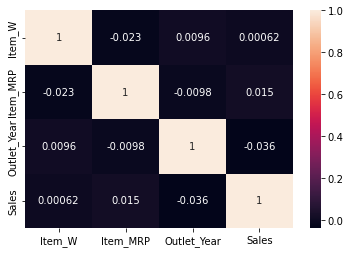

In [23]:
sns.heatmap(train.select_dtypes(include = np.number).corr(), annot=True)

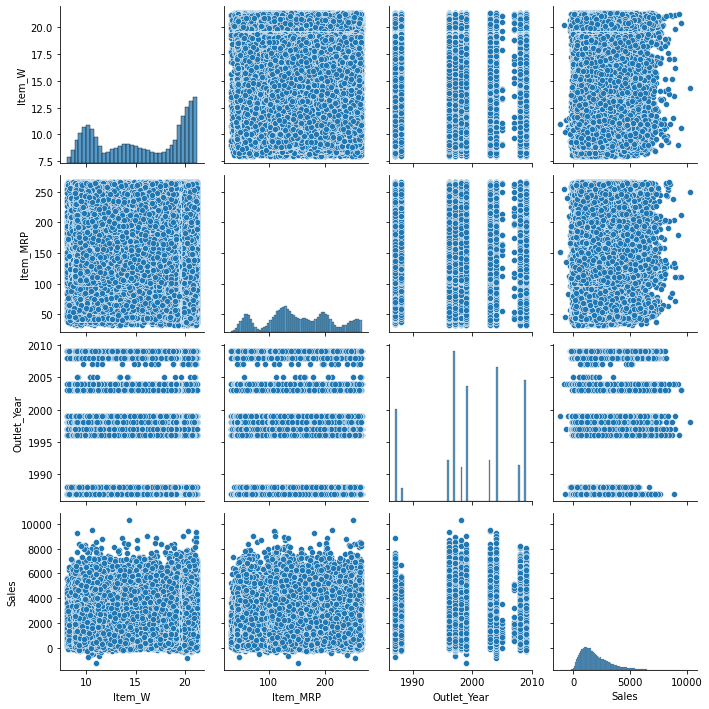

In [40]:
sns.pairplot(train)

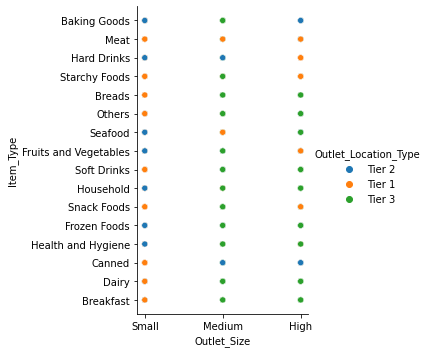

In [46]:
sns.relplot(x="Outlet_Size", y ="Item_Type",hue="Outlet_Location_Type",data =train)

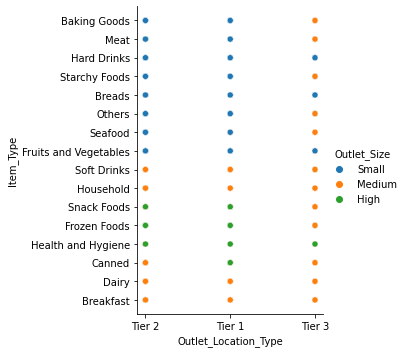

In [47]:
sns.relplot(x="Outlet_Location_Type", y ="Item_Type",hue="Outlet_Size",data =train)

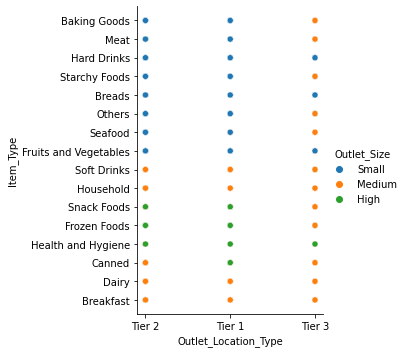

In [49]:
sns.relplot(x="Outlet_Location_Type", y ="Item_Type",hue="Outlet_Size",data =train)

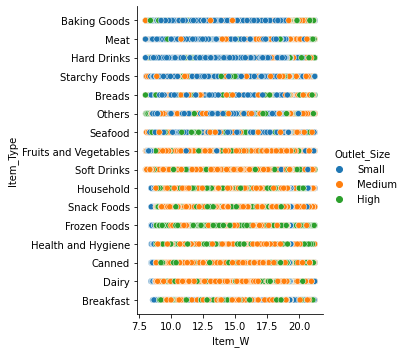

In [50]:
sns.relplot(x="Item_W", y ="Item_Type",hue="Outlet_Size",data =train)

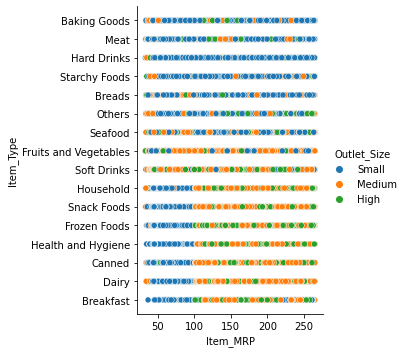

In [51]:
sns.relplot(x="Item_MRP", y ="Item_Type",hue="Outlet_Size",data =train)

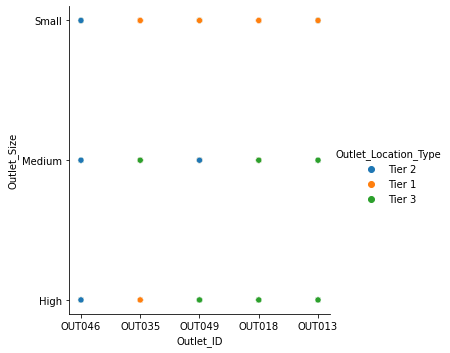

In [52]:
sns.relplot(x="Outlet_ID", y ="Outlet_Size",hue="Outlet_Location_Type",data =train)

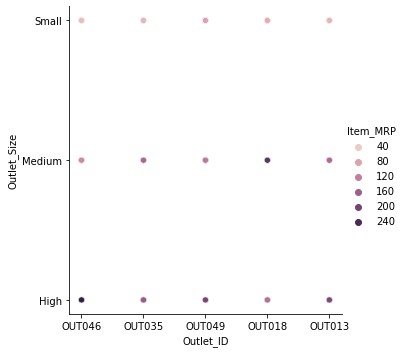

In [53]:
sns.relplot(x="Outlet_ID", y ="Outlet_Size",hue="Item_MRP",data =train)

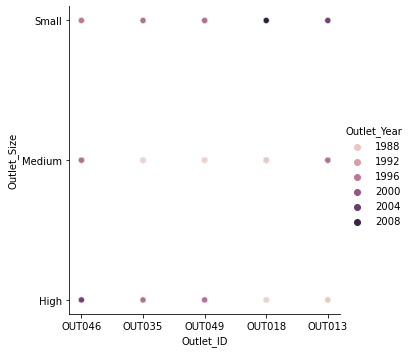

In [56]:
sns.relplot(x="Outlet_ID", y ="Outlet_Size",hue="Outlet_Year",data =train)

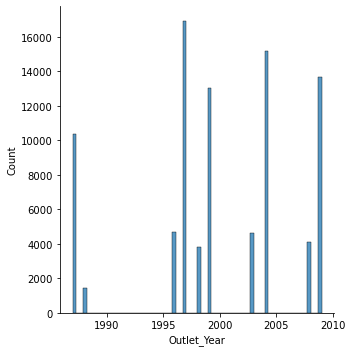

In [57]:
sns.displot(train["Outlet_Year"])

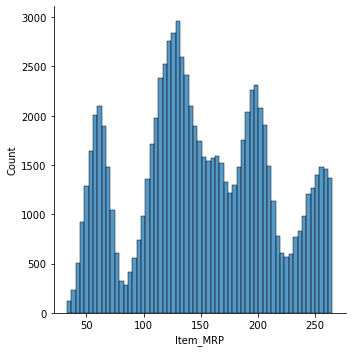

In [60]:
sns.displot(train["Item_MRP"])

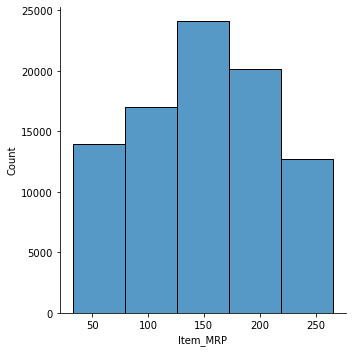

In [59]:
sns.displot(train["Item_MRP"],bins=5)

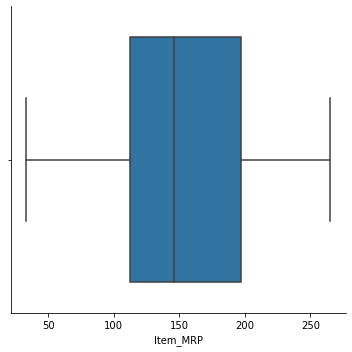

In [64]:
sns.catplot(x='Item_MRP',kind='box',data=train)

<AxesSubplot:xlabel='Item_Type'>

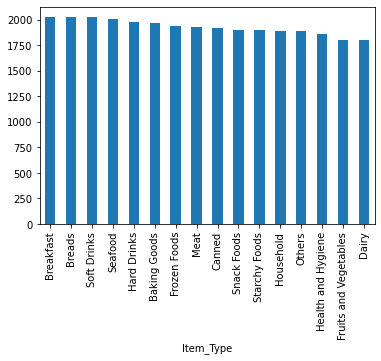

In [65]:
train.groupby(["Item_Type"]).Sales.mean().sort_values(ascending=False).plot(kind = "bar")

In [66]:
train.groupby(["Outlet_Size","Item_Type",]).Sales.mean().sort_values(ascending=False)

Outlet_Size  Item_Type            
High         Breads                   2155.071529
             Breakfast                2137.642148
             Canned                   2129.680203
             Soft Drinks              2108.053303
             Seafood                  2094.382701
             Baking Goods             2085.318349
             Meat                     2082.213450
Small        Breads                   2063.052298
High         Hard Drinks              2050.888100
             Snack Foods              2042.861089
Small        Soft Drinks              2041.434166
             Breakfast                2039.148192
             Seafood                  2029.688082
High         Frozen Foods             2026.008135
             Others                   2015.886498
             Fruits and Vegetables    1999.515557
Medium       Hard Drinks              1985.737114
Small        Baking Goods             1984.362625
             Canned                   1980.309236
Medium       So

# Data Preparation

In [67]:
train["data"]="train"
test["data"]="test"

In [68]:
train.head(5)

,Item_ID,Item_W,Item_Type,Item_MRP,Outlet_ID,Outlet_Year,Outlet_Size,Outlet_Location_Type,Sales,data
0,FDU32,21.027499,Baking Goods,197.352319,OUT046,2004,Small,Tier 2,2689.457781,train
1,NCT54,21.102371,Meat,148.250214,OUT035,1987,Small,Tier 1,3437.350375,train
2,FDW08,20.882263,Hard Drinks,205.465010,OUT035,1999,Small,Tier 3,3129.967268,train
3,FDJ22,21.050435,Starchy Foods,253.417583,OUT046,1996,Small,Tier 1,1306.514376,train
4,FDF47,21.247876,Baking Goods,240.871039,OUT035,1988,Small,Tier 3,1739.769829,train


In [69]:
test.head(5)

,Item_ID,Item_W,Item_Type,Item_MRP,Outlet_ID,Outlet_Year,Outlet_Size,Outlet_Location_Type,data
0,DRM23,10.156725,Snack Foods,119.319482,OUT013,1999,High,Tier 3,test
1,FDG47,10.434425,Household,263.600449,OUT018,1987,High,Tier 3,test
2,FDN21,11.953589,Health and Hygiene,246.286990,OUT018,1997,High,Tier 1,test
3,FDZ23,14.948546,Dairy,136.200508,OUT046,2004,Medium,Tier 2,test
4,FDC16,11.080042,Canned,173.145664,OUT018,2009,Medium,Tier 3,test


In [108]:
data=pd.concat([train,test])

In [111]:
data = data.reset_index().drop(columns="index")

In [112]:
data.head(5)

,Item_ID,Item_W,Item_Type,Item_MRP,Outlet_ID,Outlet_Year,Outlet_Size,Outlet_Location_Type,Sales,data
0,FDU32,21.027499,Baking Goods,197.352319,OUT046,2004,Small,Tier 2,2689.457781,train
1,NCT54,21.102371,Meat,148.250214,OUT035,1987,Small,Tier 1,3437.350375,train
2,FDW08,20.882263,Hard Drinks,205.465010,OUT035,1999,Small,Tier 3,3129.967268,train
3,FDJ22,21.050435,Starchy Foods,253.417583,OUT046,1996,Small,Tier 1,1306.514376,train
4,FDF47,21.247876,Baking Goods,240.871039,OUT035,1988,Small,Tier 3,1739.769829,train


In [113]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125520 entries, 0 to 125519
Data columns (total 10 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Item_ID               125520 non-null  object 
 1   Item_W                125520 non-null  float64
 2   Item_Type             125520 non-null  object 
 3   Item_MRP              125520 non-null  float64
 4   Outlet_ID             125520 non-null  object 
 5   Outlet_Year           125520 non-null  int64  
 6   Outlet_Size           125520 non-null  object 
 7   Outlet_Location_Type  125520 non-null  object 
 8   Sales                 87864 non-null   float64
 9   data                  125520 non-null  object 
dtypes: float64(3), int64(1), object(6)
memory usage: 9.6+ MB


In [114]:
data.isna().sum()

Item_ID                     0
Item_W                      0
Item_Type                   0
Item_MRP                    0
Outlet_ID                   0
Outlet_Year                 0
Outlet_Size                 0
Outlet_Location_Type        0
Sales                   37656
data                        0
dtype: int64

In [115]:
data.apply(lambda x: x.nunique())

Item_ID                    896
Item_W                  123907
Item_Type                   16
Item_MRP                125326
Outlet_ID                    5
Outlet_Year                 12
Outlet_Size                  3
Outlet_Location_Type         3
Sales                    87760
data                         2
dtype: int64

In [116]:
numeric_data_columns = data.select_dtypes(include = np.number).drop(columns = "Sales").columns

In [117]:
category_data_columns = data.select_dtypes(exclude = np.number).drop(columns=["Item_ID","data"]).columns

In [118]:
numeric_data_columns ,category_data_columns

(Index(['Item_W', 'Item_MRP', 'Outlet_Year'], dtype='object'),
 Index(['Item_Type', 'Outlet_ID', 'Outlet_Size', 'Outlet_Location_Type'], dtype='object'))

In [119]:
preprocess_category_data_columns = pd.get_dummies(data[category_data_columns])

In [120]:
preprocess_category_data_columns

,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,...,Outlet_ID_OUT018,Outlet_ID_OUT035,Outlet_ID_OUT046,Outlet_ID_OUT049,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3
0,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,1,0,0
2,0,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,1,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,1,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125515,0,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,1
125516,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,1
125517,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,1,0,0
125518,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,1


In [121]:
preprocess_category_data_columns.isna().sum()

Item_Type_Baking Goods             0
Item_Type_Breads                   0
Item_Type_Breakfast                0
Item_Type_Canned                   0
Item_Type_Dairy                    0
Item_Type_Frozen Foods             0
Item_Type_Fruits and Vegetables    0
Item_Type_Hard Drinks              0
Item_Type_Health and Hygiene       0
Item_Type_Household                0
Item_Type_Meat                     0
Item_Type_Others                   0
Item_Type_Seafood                  0
Item_Type_Snack Foods              0
Item_Type_Soft Drinks              0
Item_Type_Starchy Foods            0
Outlet_ID_OUT013                   0
Outlet_ID_OUT018                   0
Outlet_ID_OUT035                   0
Outlet_ID_OUT046                   0
Outlet_ID_OUT049                   0
Outlet_Size_High                   0
Outlet_Size_Medium                 0
Outlet_Size_Small                  0
Outlet_Location_Type_Tier 1        0
Outlet_Location_Type_Tier 2        0
Outlet_Location_Type_Tier 3        0
d

In [122]:
scaler = StandardScaler()

In [123]:
preprocess_numeric_data_columns = pd.DataFrame(scaler.fit_transform(data[numeric_data_columns]), columns=numeric_data_columns)

In [124]:
preprocess_numeric_data_columns

,Item_W,Item_MRP,Outlet_Year
0,1.410465,0.792848,0.608131
1,1.427374,-0.022995,-1.925332
2,1.377664,0.927642,-0.137005
3,1.415644,1.724386,-0.584087
4,1.460236,1.515922,-1.776305
...,...,...,...
125515,-1.897623,0.476861,1.353268
125516,-1.836644,0.007297,1.353268
125517,-2.061362,-0.035291,-0.435059
125518,-1.830998,-0.941885,1.353268


In [125]:
preprocess_numeric_data_columns.isna().sum()

Item_W         0
Item_MRP       0
Outlet_Year    0
dtype: int64

In [130]:
final_preprocessed_data = pd.concat([preprocess_category_data_columns, preprocess_numeric_data_columns,data[["Sales","Item_ID","data"]]], axis = 1)

In [131]:
final_preprocessed_data

,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,...,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Item_W,Item_MRP,Outlet_Year,Sales,Item_ID,data
0,1,0,0,0,0,0,0,0,0,0,...,1,0,1,0,1.410465,0.792848,0.608131,2689.457781,FDU32,train
1,0,0,0,0,0,0,0,0,0,0,...,1,1,0,0,1.427374,-0.022995,-1.925332,3437.350375,NCT54,train
2,0,0,0,0,0,0,0,1,0,0,...,1,0,0,1,1.377664,0.927642,-0.137005,3129.967268,FDW08,train
3,0,0,0,0,0,0,0,0,0,0,...,1,1,0,0,1.415644,1.724386,-0.584087,1306.514376,FDJ22,train
4,1,0,0,0,0,0,0,0,0,0,...,1,0,0,1,1.460236,1.515922,-1.776305,1739.769829,FDF47,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125515,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,-1.897623,0.476861,1.353268,NaN,FDY27,test
125516,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,-1.836644,0.007297,1.353268,NaN,FDK38,test
125517,0,0,0,0,0,0,0,0,0,0,...,1,1,0,0,-2.061362,-0.035291,-0.435059,NaN,DRF01,test
125518,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,-1.830998,-0.941885,1.353268,NaN,FDR58,test


In [132]:
train_preprocessed = final_preprocessed_data[final_preprocessed_data["data"]=="train"]

In [133]:
test_preprocessed = final_preprocessed_data[final_preprocessed_data["data"]=="test"]

In [135]:
train_preprocessed = train_preprocessed.drop(columns = ["data"])

In [134]:
test_preprocessed = test_preprocessed.drop(columns = ["data","Sales"])

In [136]:
train_preprocessed

,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,...,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Item_W,Item_MRP,Outlet_Year,Sales,Item_ID
0,1,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,1.410465,0.792848,0.608131,2689.457781,FDU32
1,0,0,0,0,0,0,0,0,0,0,...,0,1,1,0,0,1.427374,-0.022995,-1.925332,3437.350375,NCT54
2,0,0,0,0,0,0,0,1,0,0,...,0,1,0,0,1,1.377664,0.927642,-0.137005,3129.967268,FDW08
3,0,0,0,0,0,0,0,0,0,0,...,0,1,1,0,0,1.415644,1.724386,-0.584087,1306.514376,FDJ22
4,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,1.460236,1.515922,-1.776305,1739.769829,FDF47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87859,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,1,-1.081320,-0.037290,-1.925332,4975.646052,FDG24
87860,0,0,0,1,0,0,0,0,0,0,...,1,0,0,1,0,-0.795661,-0.360028,-1.925332,2252.492755,FDA32
87861,0,0,0,0,0,0,0,0,0,1,...,1,0,1,0,0,-0.767077,-0.508514,-0.435059,2716.058050,FDM04
87862,0,0,0,0,0,0,0,0,0,1,...,1,0,0,0,1,0.730786,1.225908,-1.776305,991.857233,NCS18


In [137]:
test_preprocessed

,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Item_W,Item_MRP,Outlet_Year,Item_ID
87864,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,-1.044663,-0.503686,-0.137005,DRM23
87865,0,0,0,0,0,0,0,0,0,1,...,1,0,0,0,0,1,-0.981945,1.893577,-1.925332,FDG47
87866,0,0,0,0,0,0,0,0,1,0,...,1,0,0,1,0,0,-0.638847,1.605909,-0.435059,FDN21
87867,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,1,0,0.037554,-0.223204,0.608131,FDZ23
87868,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,1,-0.836135,0.390649,1.353268,FDC16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125515,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,1,-1.897623,0.476861,1.353268,FDY27
125516,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,1,-1.836644,0.007297,1.353268,FDK38
125517,0,0,0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,-2.061362,-0.035291,-0.435059,DRF01
125518,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,-1.830998,-0.941885,1.353268,FDR58


# Model

In [138]:
train_X = train_preprocessed.drop(columns=["Sales","Item_ID"])

In [139]:
train_y = train_preprocessed["Sales"]

In [140]:
test_X = test_preprocessed.drop(columns=["Item_ID"])

In [144]:
def model_fit(model, train_X, train_y, test_X, submission, filename):
    model.fit(train_X, train_y)
    train_pred = np.abs(model.predict(train_X))
    test_pred = np.abs(model.predict(test_X))
    
    train_RMSE=mean_squared_error(train_y, train_pred, squared=False)
    
    print("Train RMSE = ",train_RMSE)
    submission['Sales'] = np.abs(test_pred)
    submission.to_csv(filename, index = False)
    return train_RMSE

In [146]:
model = [LinearRegression(),Ridge(), Lasso(), ElasticNet(),KNeighborsRegressor(),DecisionTreeRegressor()]

In [147]:
for i in model:
    print(i)
    model_fit(i, train_X, train_y, test_X,submission, str(i)[:-2]+".csv")
   

LinearRegression()
Train RMSE =  1281.7479860421145
Ridge()
Train RMSE =  1281.6941821036485
Lasso()
Train RMSE =  1281.8339449183798
ElasticNet()
Train RMSE =  1285.570437990772
KNeighborsRegressor()
Train RMSE =  1143.3204409698412
DecisionTreeRegressor()
Train RMSE =  20.053173508870653


In [148]:
def model_fit1(model, train_X, train_y, test_X):
    model.fit(train_X, train_y)
    train_pred = np.abs(model.predict(train_X))
    test_pred = np.abs(model.predict(test_X))
    train_RMSE=mean_squared_error(train_y, train_pred, squared=False)
    print(model)
    print("Train RMSE : ",train_RMSE)
    return train_RMSE

In [149]:
train_RMSE = []
for j in model:
    trainRMSE = model_fit1(j, train_X, train_y, test_X)
    train_RMSE.append(trainRMSE)

LinearRegression()
Train RMSE :  1281.7479860421145
Ridge()
Train RMSE :  1281.6941821036485
Lasso()
Train RMSE :  1281.8339449183798
ElasticNet()
Train RMSE :  1285.570437990772
KNeighborsRegressor()
Train RMSE :  1143.3204409698412
DecisionTreeRegressor()
Train RMSE :  20.053173508870653


In [150]:
train_RMSE 

[1281.7479860421145,
 1281.6941821036485,
 1281.8339449183798,
 1285.570437990772,
 1143.3204409698412,
 20.053173508870653]

In [151]:
model_name = ['LinearRegression','Ridge', 'Lasso','Elasticnet','KNeighborsRegressor','DecisionTreeRegressor']

In [152]:
result = pd.DataFrame([train_RMSE],columns=model_name).T

In [153]:
result.columns = ['train RMSE']

In [154]:
result

,train RMSE
LinearRegression,1281.747986
Ridge,1281.694182
Lasso,1281.833945
Elasticnet,1285.570438
KNeighborsRegressor,1143.320441
DecisionTreeRegressor,20.053174


<Figure size 7200x7200 with 0 Axes>

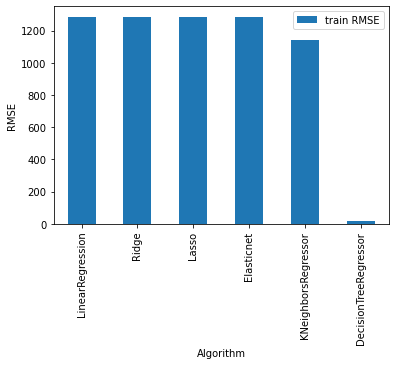

In [155]:
plt.figure(figsize=(100,100))
result.plot(kind = 'bar')
plt.xlabel("Algorithm")
plt.ylabel("RMSE")
plt.show()

In [ ]:
res = []
for k in range(1,8):
    model = KNeighborsRegressor(n_neighbors=k)
    print(k)
    err = model_fit(model, train_X,train_y,test_X,submission, str(k)+"KNN.csv")
    res.append(err)

1
Train RMSE =  20.053173508870653
2
Train RMSE =  906.171331314634
3


![](Result.PNG)